<a href="https://colab.research.google.com/github/Juliana-23/Fin-Computacionales/blob/main/Prado_UrregoTaller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Juliana Prado - Camila Urrego 


1. Escoja dos acciones de su preferencia en el mercado estadounidense. Para estas dos  acciones descargue las series de precios diarios para el periodo Ene-21 a Dic-2022 usando  pandas datareader. Con esta información:  

In [29]:
# Librerias
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
!pip install pandas_datareader.data
import pandas_datareader.data as pdr 
!pip install --quiet yfinance 
import yfinance as yf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pandas_datareader.data (from versions: none)
ERROR: No matching distribution found for pandas_datareader.data


In [30]:
yf.pdr_override()

In [31]:
activos=("GOOG", "NFLX")
precios= pdr.get_data_yahoo(activos,start="2021-01-01",end="2022-12-31")
precios1= pdr.get_data_yahoo(activos,start="2021-01-01",end="2022-12-31")["Adj Close"]
preciosmes= pdr.get_data_yahoo(activos,start="2021-01-01",end="2022-12-31", interval="1mo")["Adj Close"]
precios


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
                 GOOG        NFLX       GOOG        NFLX       GOOG   
Date                                                                  
2021-01-04  86.412003  522.859985  86.412003  522.859985  88.032501   
2021-01-05  87.045998  520.799988  87.045998  520.799988  87.383499   
2021-01-06  86.764503  500.489990  86.764503  500.489990  87.400002   
2021-01-07  89.362503  508.890015  89.362503  508.890015  89.419998   
2021-01-08  90.360497  510.399994  90.360497  510.399994  90.491997   
...               ...         ...        ...         ...        ...   
2022-12-23  89.809998  294.959991  89.809998  294.959991  90.099998   
2022-12-27  87.930000  284.170013  87.930000  284.170013  89.500000   
2022-12-28  86.459999  276.880005  86.459999  276.880005  88.519997   
2022-12-29  88.949997  291.119995  88.949997  291.119995  89.364998   
2022-12-30  88.730003  294.880005  88.730003  294.880005  88.830002   

                              Low                   Open              \
                  NFLX       GOOG        NFLX       GOOG        NFLX   
Date                                                                   
2021-01-04  540.799988  85.392502  515.090027  87.876999  539.000000   
2021-01-05  526.780029  85.900749  515.890015  86.250000  521.549988   
2021-01-06  513.099976  84.949997  499.500000  85.131500  511.970001   
2021-01-07  516.440002  86.852501  506.420013  87.002998  508.279999   
2021-01-08  513.239990  88.676750  504.510010  89.399002  511.309998   
...                ...        ...         ...        ...         ...   
2022-12-23  298.459991  87.620003  291.910004  87.620003  296.179993   
2022-12-27  293.570007  87.535004  282.130005  89.309998  293.190002   
2022-12-28  285.190002  86.370003  273.410004  87.500000  281.920013   
2022-12-29  295.500000  86.989998  281.010010  87.029999  283.179993   
2022-12-30  295.010010  87.029999  283.220001  87.364998  285.529999   

              Volume           
                GOOG     NFLX  
Date                           
2021-01-04  38038000  4444400  
2021-01-05  22906000  3133900  
2021-01-06  52042000  5346200  
2021-01-07  45300000  3686400  
2021-01-08  41012000  2973900  
...              ...      ...  
2022-12-23  17815000  4251100  
2022-12-27  15470900  5778100  
2022-12-28  17879600  5964400  
2022-12-29  18280700  9588500  
2022-12-30  19179300  7557400  

[503 rows x 12 columns]

a. Calcule los retornos logarítmicos diarios, mensuales y anualizados. Presente los  resultados en una tabla. 

In [32]:
retornosdia= np.log(precios1/precios1.shift()).dropna()
retornosmes= np.log(preciosmes/preciosmes.shift()).dropna()
retornosanual=np.log(precios1/precios1.shift(502)).dropna()

In [33]:
retornosdia

,GOOG,NFLX
Date,,
2021-01-05,0.007310,-0.003948
2021-01-06,-0.003239,-0.039778
2021-01-07,0.029504,0.016644
2021-01-08,0.011106,0.002963
2021-01-11,-0.022659,-0.022388
...,...,...
2022-12-23,0.017409,-0.009414
2022-12-27,-0.021155,-0.037267
2022-12-28,-0.016859,-0.025988


In [34]:
retornosmes

,GOOG,NFLX
Date,,
2021-02-01,0.103962,0.012061
2021-03-01,0.015477,-0.032421
2021-04-01,0.152790,-0.015824
2021-05-01,0.000597,-0.020979
2021-06-01,0.038542,0.049282
2021-07-01,0.076072,-0.020349
2021-08-01,0.073004,0.095070
2021-09-01,-0.087572,0.069802
2021-10-01,0.106695,0.123125


In [35]:
retornosanual

,GOOG,NFLX
Date,,
2022-12-30,0.026472,-0.572745


b. Calcule los retornos esperados y volatilidades anualizadas.

In [36]:
#Retornos Esperados
retornosdia.mean()

GOOG    0.000053
NFLX   -0.001141
dtype: float64

In [37]:
#Volatilidad Close-to-close
retornosdia.std()*np.sqrt(252)

GOOG    0.322342
NFLX    0.574791
dtype: float64

In [38]:
# Medida de Parkinson
r_parki = np.log(precios["High"]/precios["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*r_parki**2)**0.5
# Volatilidad anulizada de Parkinson
(sigmaPark_d.mean())*np.sqrt(252)

GOOG    0.220435
NFLX    0.333264
dtype: float64

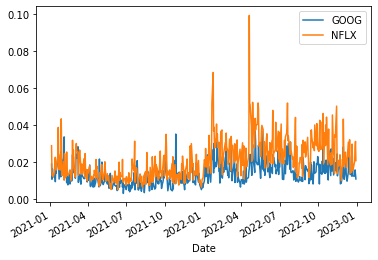

In [39]:
# Medida Garman-Klass
r_GarHL = np.log(precios["High"]/precios["Low"]).dropna()
r_GarlnCO = np.log(precios["Close"]/precios["Open"]).dropna()
sigmaGK_d = (0.5*r_GarHL**2-(2*np.log(2)-1)*r_GarlnCO**2)**0.5
sigmaGK_d.plot()

In [40]:
# Volatilidad Garman-Klass
(sigmaGK_d.mean())*np.sqrt(252)

GOOG    0.220851
NFLX    0.337871
dtype: float64

In [41]:
#Volatilidad EWMA
ewma_pd = retornosdia.ewm(alpha=0.94).std()
ewma_pd.mean()*np.sqrt(252)

GOOG    0.253597
NFLX    0.372512
dtype: float64

c. Construya una tabla resumen con las estadísticas descriptivas de las series diarias de los dos activos. 

In [42]:
resumen = retornosdia.describe()
kurt = pd.DataFrame(retornosdia.kurt()).T
kurt.rename(index={0:"kurtosis"}, inplace=True)
simetria= pd.DataFrame(retornosdia.skew()).T
simetria.rename(index={0:"Asimetria"}, inplace=True)
pd.concat([resumen,kurt,simetria], axis=0)

,GOOG,NFLX
count,502.000000,502.000000
mean,0.000053,-0.001141
std,0.020306,0.036208
min,-0.101313,-0.432578
25%,-0.009954,-0.015397
50%,0.000720,-0.000330
75%,0.010154,0.013759
max,0.074606,0.155758
kurtosis,2.244691,44.340120
Asimetria,-0.030774,-3.652144


d. Compare las distribuciones empíricas de los dos activos con la distribución teórica  normal.

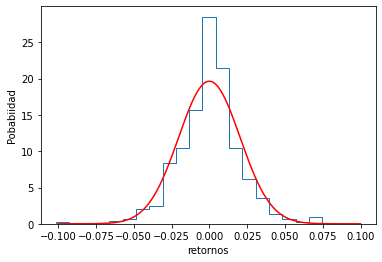

In [43]:
from scipy.stats import norm
# linspace para crear secuencias 
x = np.linspace(-0.1, 0.1, num=1000)
plt.hist(retornosdia['GOOG'], bins=20, density =True, histtype='step')
plt.xlabel('retornos')
plt.ylabel('Pobabiidad')
plt.plot(x,norm.pdf(x, scale=retornosdia['GOOG'].std()), 'r')
plt.show()

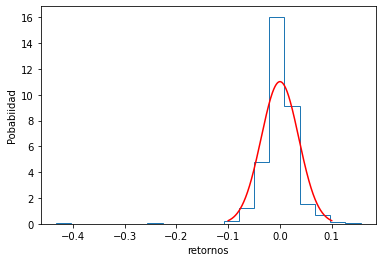

In [44]:
x = np.linspace(-0.1, 0.1, num=1000)
plt.hist(retornosdia['NFLX'], bins=20, density =True, histtype='step')
plt.xlabel('retornos')
plt.ylabel('Pobabiidad')
plt.plot(x,norm.pdf(x, scale=retornosdia['NFLX'].std()), 'r')
plt.show()

e. Calcule la matriz de correlaciones de Pearson, rango de Kendall y de Spearman. f. Implemente las pruebas de normalidad de Kolmogorov-Smirnov para todos los activos. 


In [45]:
#Matriz Correlacion Pearson
Corr_Pear = retornosdia.corr()
Corr_Pear

,GOOG,NFLX
GOOG,1.000000,0.474227
NFLX,0.474227,1.000000


In [46]:
#Rango de Kendall
import scipy.stats as stats
stats.kendalltau(retornosdia['GOOG'], retornosdia['NFLX'])

KendalltauResult(correlation=0.41255337929718255, pvalue=2.0148208353480677e-43)

In [47]:
#Rango de Spearman
stats.spearmanr(retornosdia['GOOG'], retornosdia['NFLX'])

SpearmanrResult(correlation=0.5691385954378935, pvalue=1.9722269276719259e-44)

2. Escoja 10 acciones de su preferencia en el mercado estadounidense. Para estas
acciones descargue las series de precios mensuales para el periodo Dic-17 a Dic-2022.

a. Calcule los retornos y volatilidades anualizadas.

b. Construya una tabla en la que se muestre un ranqueo de los activos de acuerdo con su
retorno esperado.

A.

In [48]:
activos=("JNJ", "WFC","AIG","UNH","WMT","XOM","MCD","AMZN","GE","CAT")
precios22= pdr.get_data_yahoo(activos,start="2017-12-01",end="2022-12-31")["Adj Close"]
precios22

[*********************100%***********************]  10 of 10 completed


,AIG,AMZN,CAT,GE,JNJ,MCD,UNH,WFC,WMT,XOM
Date,,,,,,,,,,
2017-12-01,51.744423,58.117500,124.465042,101.995201,122.644653,153.584747,210.777679,48.338821,88.377571,64.171906
2017-12-04,51.208652,56.697498,124.447456,102.394524,121.794815,151.612381,205.795883,49.362373,88.068901,64.256508
2017-12-05,51.441959,57.078499,123.251350,101.310669,122.373055,153.691330,204.559738,50.360104,88.813362,63.733643
2017-12-06,51.874043,57.617500,123.427208,100.740234,123.590935,154.126694,204.420319,50.377316,88.314018,63.264618
2017-12-07,51.735039,57.989498,125.669907,101.025452,122.670975,153.620285,204.615494,51.056808,88.323166,63.472233
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,63.160000,85.250000,238.731461,63.848557,177.479996,267.570007,531.309998,40.720249,143.770004,108.680000
2022-12-27,63.330002,83.040001,241.985947,64.668228,177.429993,266.839996,531.989990,40.779869,143.809998,110.190002
2022-12-28,62.889999,81.820000,238.243805,63.989071,176.660004,265.109985,528.450012,40.859360,141.289993,108.379997


In [49]:
rt_anual=np.log(precios22/precios22.shift(1260)).dropna()
rt_anual

,AIG,AMZN,CAT,GE,JNJ,MCD,UNH,WFC,WMT,XOM
Date,,,,,,,,,,
2022-12-05,0.168161,0.448503,0.620409,-0.434889,0.376865,0.570041,0.931538,-0.108161,0.536194,0.509860
2022-12-06,0.181166,0.442444,0.601975,-0.431500,0.368714,0.583629,0.963424,-0.135088,0.528020,0.480353
2022-12-07,0.182117,0.438123,0.614651,-0.424147,0.370036,0.564734,0.976083,-0.177231,0.514385,0.486307
2022-12-08,0.177453,0.449865,0.621662,-0.434750,0.360302,0.573124,0.985951,-0.174515,0.521570,0.501095
2022-12-09,0.184144,0.429385,0.587810,-0.463990,0.359500,0.571465,0.968954,-0.189794,0.497867,0.489355
2022-12-12,0.200687,0.443737,0.606114,-0.442612,0.367245,0.586774,0.964295,-0.180516,0.518724,0.512354
2022-12-13,0.196780,0.458997,0.617112,-0.443192,0.371014,0.577701,0.955304,-0.178685,0.511209,0.518762
2022-12-14,0.185227,0.452400,0.615251,-0.474009,0.363787,0.584517,0.956822,-0.213560,0.508010,0.514626
2022-12-15,0.194168,0.418440,0.563547,-0.498793,0.349047,0.566630,0.928459,-0.217415,0.488136,0.500658


In [50]:
vol_anual=rt_anual.std()*np.sqrt(252)
vol_anual2=pd.DataFrame(vol_anual,columns=["Volatilidades Anualizadas"])
vol_anual2


,Volatilidades Anualizadas
AIG,0.191848
AMZN,0.709284
CAT,0.427550
GE,0.450599
JNJ,0.149547
MCD,0.232982
UNH,0.275183
WFC,0.697502
WMT,0.444001
XOM,0.256895


B.

In [51]:
rt_esp=rt_anual.mean()
rt_esp2=pd.DataFrame(rt_esp,columns=["Retornos Esperados"])
rt_esp2

,Retornos Esperados
AIG,0.190833
AMZN,0.399797
CAT,0.585241
GE,-0.452628
JNJ,0.360971
MCD,0.562484
UNH,0.949441
WFC,-0.211475
WMT,0.488751
XOM,0.510557


In [52]:
rt_esp=pd.DataFrame(rt_esp,columns=["Retornos Esperados"])
rend=rt_esp.sort_values("Retornos Esperados", ascending=False)
rend

,Retornos Esperados
UNH,0.949441
CAT,0.585241
MCD,0.562484
XOM,0.510557
WMT,0.488751
AMZN,0.399797
JNJ,0.360971
AIG,0.190833
WFC,-0.211475
GE,-0.452628


3. Descargue la serie mensual de precios del índice estadounidense Rusell para el periodo  Dic-11 a Dic-2022. Con esta información calcule la volatilidad mensual y anualizada usando  las siguientes medidas:


1. Desviación estándar 
2. Parkinson 
3. Garman-Klass  
4. Volatilidad ponderada exponencial (EWMA) con una lambda de 0.94. 


In [53]:
precios_rut = yf.download(tickers= '^RUT', start="2011-12-31",end="2022-12-31")
precios_rut1= yf.download(tickers= '^RUT', start="2011-12-31",end="2022-12-31")["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


A

In [54]:
retornos= np.log(precios_rut1/precios_rut1.shift()).dropna()
#Volatilidad Close to Close anualizado
retornos.std()*np.sqrt(252)

0.2185816915644669

In [55]:
#Volatilidad Close to Close mensual
retornos.std()*np.sqrt(12)

0.04769843557741238

B

In [56]:
# Medida de Parkinson
r_parki = np.log(precios_rut["High"]/precios_rut["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*r_parki**2)**0.5
# Volatilidad anulizada de Parkinson Anual
(sigmaPark_d.mean())*np.sqrt(252)

0.1379708438811804

In [57]:
# Volatilidad anulizada de Parkinson Anual
(sigmaPark_d.mean())*np.sqrt(12)

0.03010770646583066

C

In [58]:
# Medida Garman-Klass
r_GarHL = np.log(precios_rut["High"]/precios_rut["Low"]).dropna()
r_GarlnCO = np.log(precios_rut["Close"]/precios_rut["Open"]).dropna()
sigmaGK_d = (0.5*r_GarHL**2-(2*np.log(2)-1)*r_GarlnCO**2)**0.5
# Volatilidad Garman-Klass Anual
(sigmaGK_d.mean())*np.sqrt(252)

0.12851256011692375

In [59]:
# Volatilidad Garman-Klass mensual
(sigmaGK_d.mean())*np.sqrt(12)

0.028043739737541235

D

In [60]:
# Volatilidad de EWMA Anual
L = 0.94
t = (retornos-1)
t1 = t[::-1] 
k = np.arange(2767-1,-1,-1)
alpha = np.power(L,k)
pd.Series(alpha)
varEWMA = (alpha[0:2767]*retornos**2)
var = varEWMA.sum()*(1-L)
vol = np.sqrt(var)
vol*np.sqrt(252)

0.23813792370280473

In [61]:
# Volatilidad de EWMA Mensual
vol*np.sqrt(12)

0.05196595529560577